In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, fmin_tnc, fsolve

## Machine Learning: Programming Exercise 2

## 1. Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
    Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams. ex2.mlx will guide you through the exercise. To begin, run the code below to load the data into MATLAB.

In [3]:
## Load Data
## The first two columns contain the exam scores and the third column contains the label.
data = pd.read_csv("ex2data1.txt", header=None, sep=",");
X = np.array(data.iloc[:, 0:2]) 
y = np.array([data.iloc[:,2].values]).T

### 1.1 Visualizing the data

<Figure size 432x360 with 0 Axes>

Text(0.5, 0, 'Exam 1 score')

Text(0, 0.5, 'Exam 2 score')

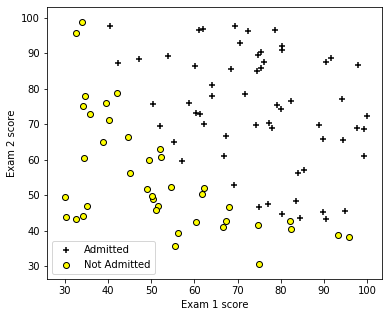

In [4]:
pos = data[data.iloc[:,2] == 1]
neg = data[data.iloc[:,2] == 0]
plt.figure(figsize=(6,5))
plt.scatter(x = pos.iloc[:,0], y =pos.iloc[:,1], marker='+', c='black', label='Admitted')
plt.scatter(x = neg.iloc[:,0], y =neg.iloc[:,1], marker='o', c='yellow', edgecolor='black', label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

### 1.2 Implementation
#### 1.2.1 Warmup exercise: sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

<center> $h_{\theta}(x) = g(\theta^Tx)$ </center> 

where function  is the sigmoid function. The sigmoid function is defined as:

<center> $g(z) = \frac{1}{1+e^{-z}}$ </center> 

Your first step is to implement this function in sigmoid.m so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x) in the code section below. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. 

Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-1.*z))

#### 1.2.2 Cost Function and Gradient

In [6]:
def costFunction(theta, X, y):
    m = len(y)
    
    h_theta = sigmoid(np.dot(X,theta))
    J = -(np.dot(y.T, np.log(h_theta))+np.dot((1-y).T, np.log(1-h_theta)))/m
    return J

def gradient(theta, X, y):
    m = len(y)
    h_theta = sigmoid(np.dot(X,theta))
    grad = (1/m)*np.dot((h_theta - y).T, X)
    
    return grad

In [7]:
(m, n) = X.shape;

# Add intercept term to X
X = np.concatenate((np.ones((m,1)), X), axis=1)

initial_theta = np.zeros((n + 1, 1))

In [8]:
# Compute and display the initial cost and gradient
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost at initial theta (zeros): %f'%cost)
print('Gradient at initial theta (zeros): ', grad)

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros):  [[ -0.1        -12.00921659 -11.26284221]]


#### 1.2.3 Learning parameters using fmin_tnc

In [9]:
def fit(theta, X, y):
    opt_weights = fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(X, y.flatten()))
    return opt_weights[0]
theta = fit(initial_theta, X, y)

In [10]:
theta

array([-25.16131873,   0.20623159,   0.20147149])

In [11]:
line_vals = (-theta[0]-theta[1]*data.iloc[:,0])/theta[2]

<Figure size 432x360 with 0 Axes>

Text(0.5, 0, 'Exam 1 score')

Text(0, 0.5, 'Exam 2 score')

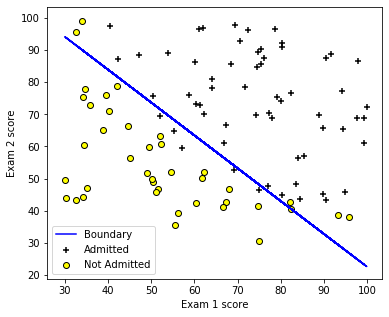

In [12]:
# Plot Boundary

pos = data[data.iloc[:,2] == 1]
neg = data[data.iloc[:,2] == 0]
plt.figure(figsize=(6,5))
plt.scatter(x = pos.iloc[:,0], y =pos.iloc[:,1], marker='+', c='black', label='Admitted')
plt.scatter(x = neg.iloc[:,0], y =neg.iloc[:,1], marker='o', c='yellow', edgecolor='black', label='Not Admitted')
plt.plot(data.iloc[:,0], line_vals, c='blue', label='Boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

#### 1.2.4 Evaluating logistic regression

In [13]:
# Predict probability for a student with score 45 on exam 1  and score 85 on exam 2 
prob = sigmoid(np.dot(np.array([1,45, 85]).T, theta))
print('For a student with scores 45 and 85, we predict an admission probability of %f'%prob)

For a student with scores 45 and 85, we predict an admission probability of 0.776291


In [14]:
def predict(theta, X):
    return sigmoid(np.dot(X, theta)) >= 0.5

In [15]:
# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: ', np.mean((p == y)) * 100);

Train Accuracy:  52.2


## 2. Regularized logistic regression

In [16]:
## Load Data
## The first two columns contain the exam scores and the third column contains the label.
data = pd.read_csv("ex2data2.txt", header=None, sep=",");
X = np.array(data.iloc[:, 0:2]) 
y = np.array([data.iloc[:,2].values]).T

### 2.1 Visualizing the data

<Figure size 432x360 with 0 Axes>

Text(0.5, 0, 'Microchip Test 1')

Text(0, 0.5, 'Microchip Test 2')

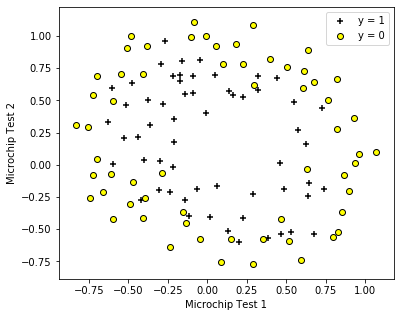

In [17]:
pos = data[data.iloc[:,2] == 1]
neg = data[data.iloc[:,2] == 0]
plt.figure(figsize=(6,5))
plt.scatter(x = pos.iloc[:,0], y =pos.iloc[:,1], marker='+', c='black', label='y = 1')
plt.scatter(x = neg.iloc[:,0], y =neg.iloc[:,1], marker='o', c='yellow', edgecolor='black', label='y = 0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

### 2.2 Feature Mapping

In [18]:
def mapFeature(X1, X2):
    degree = 6
    ncols = 28
    out = np.zeros((X1.shape[0], ncols))
    c = 0
    for i in range(7):
        for j in range(i+1):
            out[:,c] = (X1**(i-j))*(X2**j)
            c += 1
    return out

In [19]:
X = mapFeature(X[:,0], X[:,1])

In [20]:
X.shape

(118, 28)

### 2.3 Cost function and gradient

In [28]:
def costFunctionReg(theta, X, y, lamb):
    m = len(y)
    h_theta = sigmoid(np.dot(X,theta))
    J = -(np.dot(y.T, np.log(h_theta))+np.dot((1-y).T, np.log(1-h_theta)))/m + lamb*np.sum(theta[1:]**2)/(2*m)
    return J

def gradientReg(theta, X, y, lamb):
    m = len(y)
    h_theta = sigmoid(np.dot(X,theta))
    temp = theta.copy()
    temp[0] = 0
    grad = (1/m)*np.dot((h_theta - y).T, X) + lamb*temp/m
    return grad

In [29]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
lamb = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost = costFunctionReg(initial_theta, X, y, lamb)
grad = gradientReg(initial_theta, X, y, lamb)
print('Cost at initial theta (zeros): ', cost);

Cost at initial theta (zeros):  [[0.69314718]]


### 2.4 Learning parameters using fmin_tnc

In [30]:
def fit(theta, X, y, lamb):
    opt_weights = fmin_tnc(func=costFunctionReg, x0=theta, fprime=gradientReg, args=(X, y.flatten(),lamb))
    return opt_weights[0]
theta = fit(initial_theta, X, y, lamb)

In [31]:
theta

array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.4316693 ,  0.12393227, -0.36553118, -0.35725403, -0.17516292,
       -1.4581701 , -0.05098418, -0.61558553, -0.27469166, -1.19271298,
       -0.2421784 , -0.20603298, -0.04466178, -0.27778951, -0.29539513,
       -0.45645982, -1.04319154,  0.02779373, -0.29244871,  0.0155576 ,
       -0.32742406, -0.1438915 , -0.92467487])